<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 3</h3>
    <h5>Ejercicio 1</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

# COMIENZA EJEMPLO

In [ ]:
# !pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import itertools
from statsmodels.tsa.arima.model import ARIMA
import warnings



from pmdarima.arima import auto_arima
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.tsa.arima_process import ArmaProcess

# **MODELO MA**

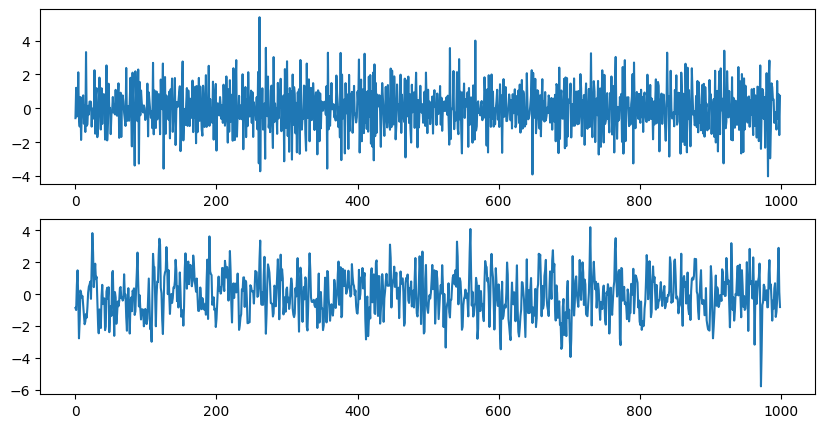

In [ ]:
# Grafico 1: MA parametro: -0.9
plt.subplot(2, 1, 1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
datos_simulados_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(datos_simulados_1);

# Grafico 2: MA parametro: +0.9
plt.subplot(2, 1, 2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
datos_simulados_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(datos_simulados_2);

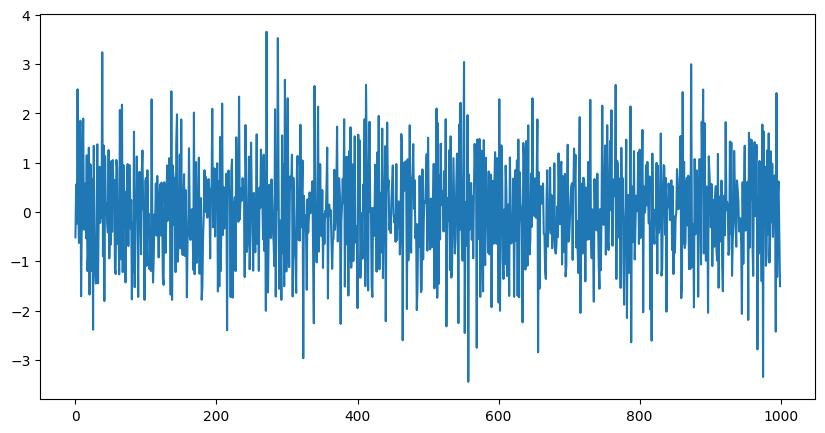

In [ ]:
# Grafico 3: MA parametro: -0.3
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
datos_simulados_3 = MA_object3.generate_sample(nsample=1000)
plt.plot(datos_simulados_3);

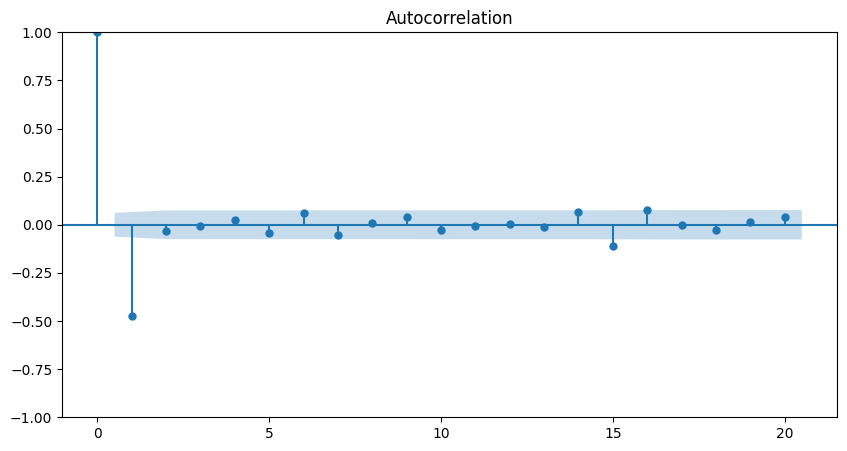

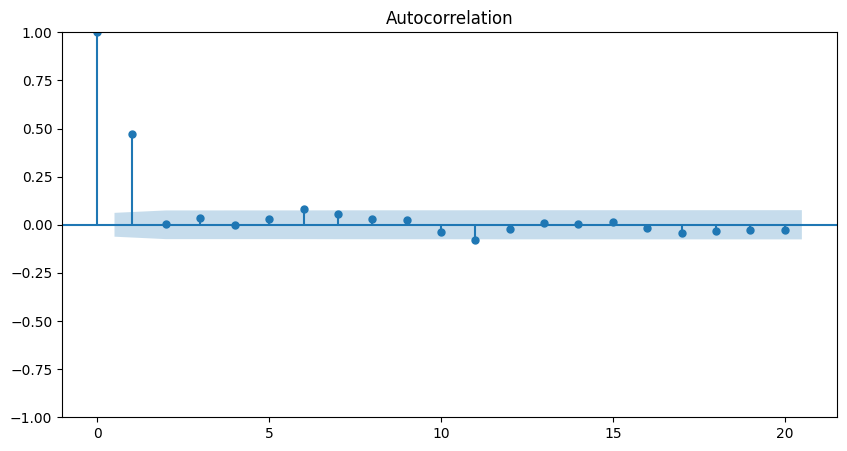

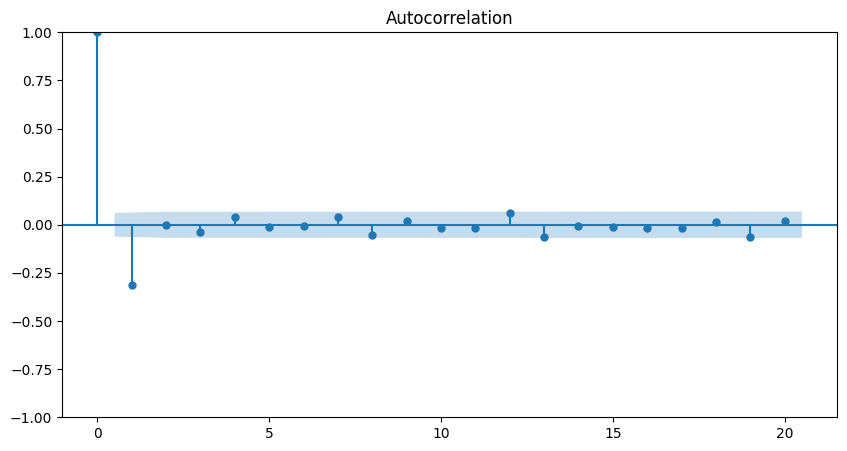

In [ ]:
# grafico ACF de los datos simulados 1:
plot_acf(datos_simulados_1, lags=20);

# grafico ACF de los datos simulados 2:
plot_acf(datos_simulados_2, lags=20);

# grafico ACF de los datos simulados 3:
plot_acf(datos_simulados_3, lags=20);

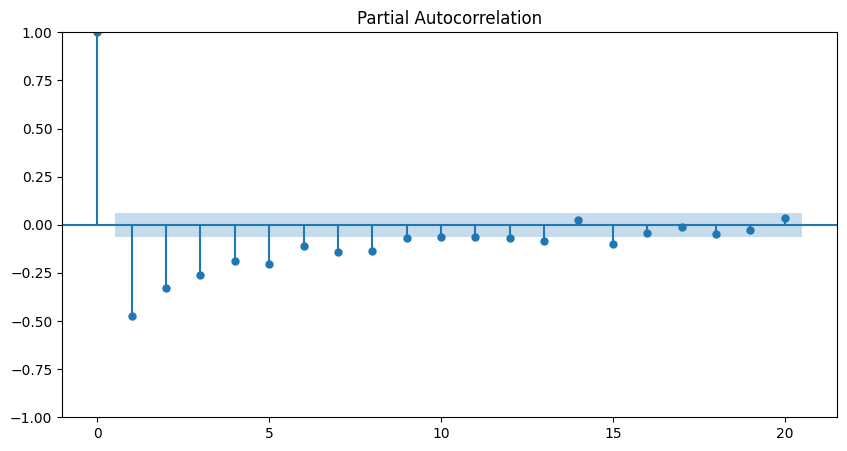

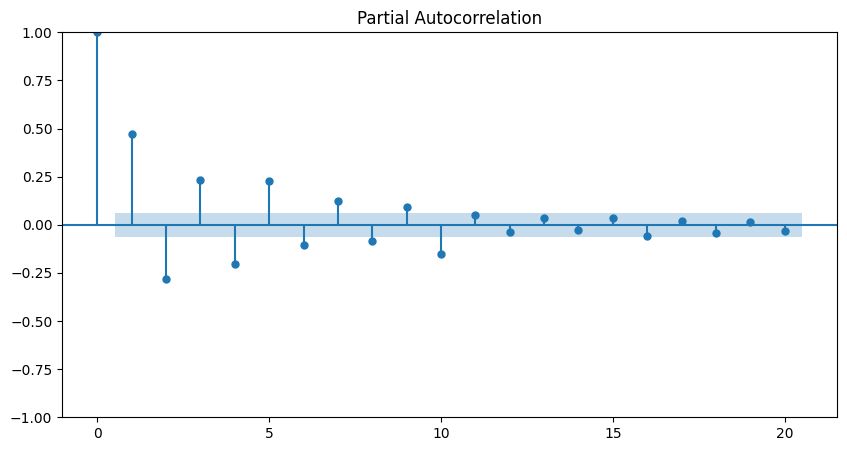

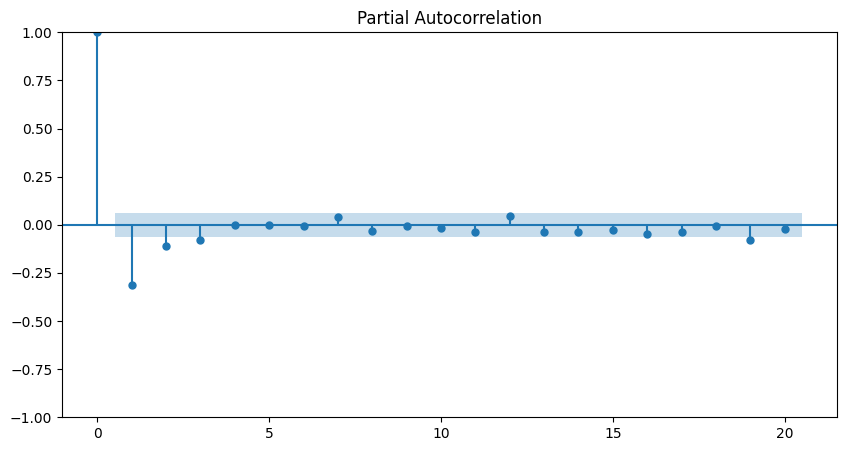

In [ ]:
# grafico PACF de los datos simulados 1:
plot_pacf(datos_simulados_1, lags=20);

# grafico PACF de los datos simulados 2:
plot_pacf(datos_simulados_2, lags=20);

# grafico PACF de los datos simulados 3:
plot_pacf(datos_simulados_3, lags=20);

*Aqui* vemos el modelo MA(1) de los simulados 1:

In [ ]:
modelo1 = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,1))
resultado1 = modelo1.fit()

resultado1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1408.240
Date:                Mon, 04 Sep 2023   AIC                           2822.481
Time:                        21:15:39   BIC                           2837.204
Sample:                             0   HQIC                          2828.076
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.003      1.252      0.211      -0.002       0.009
ma.L1         -0.9118      0.012    -73.683      0.000      -0.936      -0.888
sigma2         0.9771      0.042     23.070      0.000       0.894       1.060
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.70   Prob(JB):                         0.60
Heteroskedasticity (H):               1.06   Skew:                            -0.04
Prob(H) (two-sided):                  0.62   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

AUTO-ARIMA por libreria

In [ ]:
stepwise_fit = auto_arima(datos_simulados_1, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2826.520, Time=3.68 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3411.748, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3159.740, Time=0.17 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2822.481, Time=0.97 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3409.755, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2824.283, Time=1.45 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2824.267, Time=2.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2826.017, Time=2.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2822.003, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2823.845, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2823.832, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3157.757, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2825.583, Time=0.44 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 11.646 seconds


AUTO-ARIMA manual

In [ ]:
# Determinamos los parametros p, d y q
p = d = range(0, 3)
q = range(2)


# Combinacion de los diferentes pamatros para luego probar
pdq = list(itertools.product(p, d, q))


# Inicializa para el loop, con el primer modelo que genera

loopinicial = sm.tsa.arima.ARIMA(datos_simulados_1, order=(0,0,0))
loopinicialresult = loopinicial.fit()
RESULTADOAIC = loopinicialresult.aic

orden=[]

# Iniciamos el loop
for param in pdq:

  mod = ARIMA(datos_simulados_1, order=(param))
  results = mod.fit()

  if results.aic < RESULTADOAIC:
    RESULTADOAIC = results.aic
    orden = param

print(f"El mejor modelo es un ARIMA{orden}, arrojo el menor AIC de = {RESULTADOAIC  } ")


2822.4805588804697
(0, 0, 1)
El mejor modelo es un ARIMA(0, 0, 1), arrojo el menor AIC de = 2822.4805588804697 


# TRABAJAMOS CON LOS DATOS SIMULADOS DEL CASO 2

*Aqui* vemos el modelo MA(1) de los simulados 2:

In [ ]:
modelo2_A = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,1))
resultado2A = modelo2_A.fit()

resultado2A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1436.938
Date:                Thu, 31 Aug 2023   AIC                           2879.875
Time:                        16:24:14   BIC                           2894.598
Sample:                             0   HQIC                          2885.471
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0734      0.062     -1.192      0.233      -0.194       0.047
ma.L1          0.9011      0.014     65.686      0.000       0.874       0.928
sigma2         1.0349      0.045     22.972      0.000       0.947       1.123
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.75
Prob(Q):                              0.91   Prob(JB):                         0.09
Heteroskedasticity (H):               1.08   Skew:                             0.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1,12 y 13 de los simulados 2:

In [ ]:
modelo2_B = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,1,1)))
resultado2B = modelo2_B.fit()

resultado2B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 12, 13])   Log Likelihood               -1434.618
Date:                      Thu, 31 Aug 2023   AIC                           2879.236
Time:                              16:24:41   BIC                           2903.775
Sample:                                   0   HQIC                          2888.563
                                     - 1000                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0743      0.066     -1.132      0.258      -0.203       0.054
ma.L1          0.9003      0.015     61.504      0.000       0.872       0.929
ma.L12         0.0608      0.032      1.892      0.059      -0.002       0.124
ma.L13         0.0661      0.032      2.084      0.037       0.004       0.128
sigma2         1.0301      0.045     23.078      0.000       0.943       1.118
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.49
Prob(Q):                              0.97   Prob(JB):                         0.06
Heteroskedasticity (H):               1.07   Skew:                             0.16
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

*Aqui* vemos el modelo MA teniendo en cuenta los lags 1 y 13 de los simulados 2:

In [ ]:
modelo2_C = sm.tsa.arima.ARIMA(datos_simulados_2, order=(0,0,(1,0,0,0,0,0,0,0,0,0,0,0,1)))
resultado2C = modelo2_C.fit()

resultado2C.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1000
Model:             ARIMA(0, 0, [1, 13])   Log Likelihood               -1437.578
Date:                  Thu, 31 Aug 2023   AIC                           2883.157
Time:                          16:25:14   BIC                           2902.788
Sample:                               0   HQIC                          2890.618
                                 - 1000                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0738      0.064     -1.158      0.247      -0.199       0.051
ma.L1          1.0450      0.029     35.657      0.000       0.988       1.102
ma.L13         0.0450      0.019      2.346      0.019       0.007       0.083
sigma2         0.9120      0.053     17.242      0.000       0.808       1.016
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 5.47
Prob(Q):                              0.57   Prob(JB):                         0.06
Heteroskedasticity (H):               1.07   Skew:                             0.16
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_2, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2882.887, Time=2.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3473.953, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3157.758, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2879.875, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3474.806, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2881.864, Time=0.49 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2881.865, Time=0.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2883.875, Time=0.70 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2879.317, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2881.294, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2881.297, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3156.679, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2883.052, Time=0.56 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 5.963 seconds


In [ ]:
AIC= [resultado2A.aic,resultado2B.aic,resultado2C.aic]
BIC= [resultado2A.bic,resultado2B.bic,resultado2C.aic]
HQIC= [resultado2A.hqic,resultado2B.hqic,resultado2C.aic]

In [ ]:
MODELOS = ('Lag 1', 'Lags 1, 12 y 13', 'Lags 1 y 13')
resumen2 = pd.DataFrame({'AIC':AIC, 'BIC': BIC,'HQIC':HQIC}, index=MODELOS)
resumen2.index.name = 'MODELOS'

resumen2.round(4)

,AIC,BIC,HQIC
MODELOS,,,
Lag 1,2879.8751,2894.5984,2885.4710
"Lags 1, 12 y 13",2879.2361,2903.7749,2888.5625
Lags 1 y 13,2883.1566,2883.1566,2883.1566


*Aqui* vemos el modelo MA(1) de los simulados 3:

In [ ]:
modelo3 = sm.tsa.arima.ARIMA(datos_simulados_3, order=(0,0,1))
resultado3 = modelo3.fit()

resultado3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1408.349
Date:                Thu, 31 Aug 2023   AIC                           2822.699
Time:                        16:27:17   BIC                           2837.422
Sample:                             0   HQIC                          2828.294
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0628      0.021     -2.930      0.003      -0.105      -0.021
ma.L1         -0.3160      0.030    -10.501      0.000      -0.375      -0.257
sigma2         0.9789      0.044     22.131      0.000       0.892       1.066
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.78   Prob(JB):                         0.52
Heteroskedasticity (H):               0.86   Skew:                            -0.09
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
stepwise_fit = auto_arima(datos_simulados_3, trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2825.153, Time=1.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2910.356, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2836.291, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2822.699, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2912.084, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2823.768, Time=0.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2823.735, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2823.297, Time=0.81 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2829.132, Time=0.06 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 3.076 seconds


FIN DEL CODIGO - GRACIAS